## Regresión Logistica

Usa un **enfoque probabilístico**.

$h_{\theta}(x)$ debería ser $p(y=1/x;\theta)$.

Modelo de regresión logística:

$$h_{\theta}(x)=g(\theta^{T}x)$$
$$g(z) = \frac{1}{1+e^{-z}}$$
$$h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}}$$

<img src='https://drive.google.com/uc?export=view&id=1MeNaOMGnQE1uBOLfJAR4b53d0v630mHR' width="400" align="center" style="margin-right: 20px">

$\theta^{T}x$ debería tener valores **negativos** grandes para instancias negativas y valores **positivos** grandes para instancias positivas.

Definir un umbral:

* Predecir $y=1$ si $h_{\theta}(x) 	\geq0.5$
* Predecir $y=0$ si $h_{\theta}(x) 	< 0.5$

<img src='https://drive.google.com/uc?export=view&id=1esyo1Y8jCivlo7Xwyeyd0CWiVnWO6Ftk' width="400" align="center" style="margin-right: 20px">

## <font color='blue'>**Aplicación de Regresión Logística**</font>


Ejemplo basado en este [link](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html).





Definiremos los límites de decisión de un clasificador de regresión logística para las dos primeras dimensiones (longitud y ancho del sépalo) del conjunto de datos de la flor de iris. Los puntos de datos están coloreados de acuerdo con sus etiquetas.

<img src='https://drive.google.com/uc?export=view&id=1ZYk0BQjKqxm9jy72TnjjsjU1XB8eNE4W' width="400" align="center" style="margin-right: 20px">

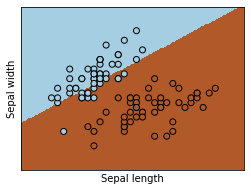

In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
# importar la data de la flor iris
iris = datasets.load_iris()

X = iris.data[:, :2]  # seleccionar las 2 primeras características.
y = iris.target
X = X[y<2]            # usaremos solo 2 clases
y = y[y<2]            # usaremos solo 2 clases

def plot_decision_boundary(X, y, regression):
    # Gráfico de los límites de decisión. Para eso, asignaremos un color a cada
    # punto en la malla [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # tamaño de paso en la malla
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = regression.predict(np.c_[xx.ravel(), yy.ravel()])

    # Poner el resultado en un gráfico de color
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plotear los puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

# crear una instancia de clasificador de regresión logística
logreg = LogisticRegression(C=1e+3, solver='lbfgs', max_iter=2).fit(X, y)
plot_decision_boundary(X, y, logreg)

## 1) Carguemos el data set


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [10]:
# Data set cargado.

iris = load_iris()
x = iris.data
y = iris.target
# Transformelo a data frame para visualizarlo
df = pd.DataFrame(x,columns = iris.feature_names)
df['species_id'] = y
species_map = {0:'setosa',1:'versicolor',2:'virginica'}
df['species_name'] = df['species_id'].map(species_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## <font color='green'>**Actividad 1**</font>
## Realice un analisis exploratorio con el objetivo de indentificar la factibilidad de construir un clsificador de especies. ¿Que especie se ve facilmente separable?

In [4]:
df['species_name'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species_name, dtype: int64

In [5]:
df['species_name'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## 2) Estadistica descriptiva y visualizaciones

Hagalo para todas las especies, observa diferencias.

```
setosa_mask = df['species_name'] == 'setosa'
df[setosa_mask].describe()
```



In [6]:
# Aquí su código.
setosa_mask = df['species_name'] == 'setosa'
df[setosa_mask].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


NameError: name 'sns' is not defined

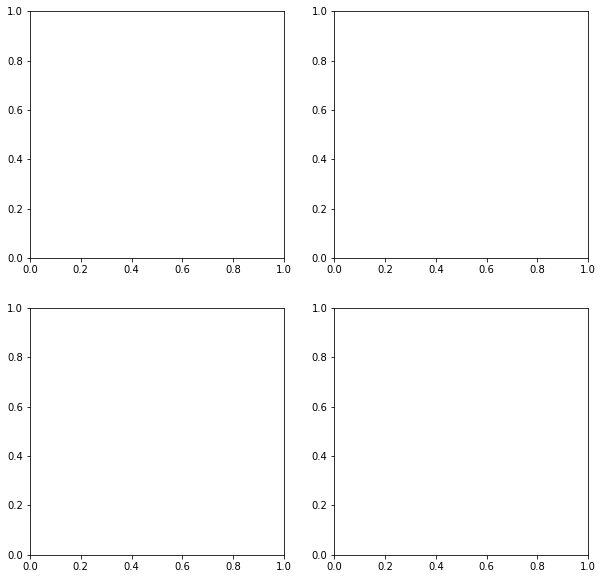

In [7]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
sns.barplot(x = 'species_name', y = 'sepal length (cm)', data = df, ax = ax[0,0])
sns.barplot(x = 'species_name', y = 'sepal width (cm)', data = df, ax = ax[0,1])
sns.barplot(x = 'species_name', y = 'petal length (cm)', data = df, ax = ax[1,0])
sns.barplot(x = 'species_name', y = 'petal width (cm)', data = df, ax = ax[1,1])


### Realice un pair plot

Utilice lo visto en cursos anteriores.

In [ ]:
# Aquí el Pair plot
import seaborn as sns
#g = sns.pairplot(df, x_vars=iris.feature_names, y_vars=iris.feature_names)
sns.pairplot(data=df,hue='species_id')
plt.show()



## <font color='green'>**Fin Actividad 1**</font>

### Adaptando el data set a un problema binario.

Como se vió en las visualizaciones anteriores. Vamos a reconocer setosa de las otras especies. Para esto debemos adaptar nuestra variable de salida.

```
y1 = np.where(y==2, 1, y) 
print(y1)
```



In [11]:
# Aquí su codigo Setosa y no Setosa
y1 = np.where(y==2, 1, y) 
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


## 3) Conjunto de entrenamiento y validación

Utilice el mismo metodo que en regresion lineal para realizar split y LogisticRegression para la regresión logistica.





In [14]:
# Aqui realice el fit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.33, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

## 4) Verificacion

```
probabilidades = log_reg.predict_proba(x_test)
for i in range(0,len(y_test)):
  print (y_test[i],probabilidades[i])

```



In [ ]:
probabilidades = log_reg.predict_proba(x_test)
for i in range(0,10):      prit (y_test[i],probabilidades[i])

## 5)  ¿Como funciona?

Dado un conjunto de entradas X, queremos asignarlas a una de dos categorías posibles (0 o 1). La regresión logística modela la probabilidad de que cada entrada pertenezca a una categoría particular.

## ¿Como medimos que tan buenos esta siendo nuestro modelo?
### La función de perdida. Entropía cruzada

La entropía de una variable aleatoria X, es el nivel de incertidumbre inherente a las posibles variables de resultado.

Sea $p(x)$ una distribución de probabilidad de una variable aleatoria $X$. Entonces la **entropía** se define por:

$$ H(X) =- \sum_x p(x) log(p(x))$$ para el caso discreto.


![Log](https://drive.google.com/uc?export=view&id=1RW2paVAoK7kmrGl8C-Y5Zim6YpeLtVsF) 


Veamos un ejemplo concreto:

![Entropia](https://drive.google.com/uc?export=view&id=13pUhML_hNg6sdHG9h5lToPu1Mxx9uPuB) 


Calcule la entropía para cada uno de los contenedores.

1. $ -[\frac{26}{30}log_2(\frac{26}{30}) + \frac{4}{30}log_2(\frac{4}{30}) ]$ = 0.5665

2. =  0.9968

3. =  0

Nuestra entropía esta midiendo un desorden (Termodinamica, Mecánica estadística), o la cantidad de ruido que contiene una señal (Teoria de la información).

Entropia Cruzada: 

También se llama pérdida logarítmica o pérdida logística. Cada probabilidad de clase predicha se compara con la salida deseada de clase real 0 o 1 y se calcula una puntuación/pérdida que penaliza la probabilidad en función de qué tan lejos está del valor esperado real. La penalización es de naturaleza logarítmica, lo que genera una puntuación grande para las diferencias grandes cercanas a 1 y una puntuación pequeña para las diferencias pequeñas que tienden a 0.

![EntropiaCruzada](https://drive.google.com/uc?export=view&id=1VlvM3dWPbapiJFUs_cVe2gkAlRHCrEGz) 


$$L{CE} = - \sum_{i=1}^n t_ilog(p_i)$$, para n clases. 
Donde $t_i$ es el truth label y $p_i$ la probabilidad obtenida de la función softmax para la $i^{th}$ clase.

$$ \sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

En el caso del ejemplo tenemos:

$L_{CE} = -1log_2(0.936)+0+0+0$ = 0.095

```
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
```



### El gradiente

1. **¿Que es el gradiente?:** El gradiente es un vector que es tangente de una función y apunta en la dirección de mayor aumento de esta función. El gradiente es cero en un máximo o mínimo local porque no hay una única dirección de aumento. En matemáticas, el gradiente se define como una derivada parcial para cada variable de entrada de la función.

$$ \nabla f(x,y) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$$

2. **¿Que es el gradiente descendente?:**  Como el gradiente es un vector que apunta al mayor aumento de una función, el gradiente negativo es un vector que apunta al mayor descenso de una función. Por lo tanto, podemos minimizar una función moviéndonos iterativamente **un poco** en la dirección del gradiente negativo. Esa es la lógica del descenso en gradiente.

Dado un punto de partida $(X_1^{0}, ...,X_n^{0})$
$$ x_1^{(i+1)} = x_1^{(i)} - \alpha \frac{\partial f}{\partial x_1}(x^{(i)})$$

$$ x_n^{(i+1)} = x_n^{(i)} - \alpha \frac{\partial f}{\partial x_n}(x^{(i)})$$


![GradientDescent](https://drive.google.com/uc?export=view&id=15VIlre07RyAx_VsUFVtS7Hyt1Nk5w3WN) 

Un parámetro importante en el descenso de gradientes es la tasa de aprendizaje (LearningRate, $\alpha$), que determina el tamaño de cada paso. Cuando la tasa de aprendizaje es demasiado grande, el descenso en pendiente puede saltar a través del valle y terminar en el otro lado. Esto conducirá a la divergencia de la función de costos. Por otro lado, cuando la tasa de aprendizaje es demasiado pequeña, el algoritmo tardará mucho en converger. Por lo tanto, se necesita una velocidad de aprendizaje adecuada antes de que comience el descenso de gradiente.


![Learningrate](https://drive.google.com/uc?export=view&id=1-EPuN5D59Phhhk-FKCfzz3yqk2mbsC39)  


La normalización juega un papel importante en Gradient Descent. Si las características no están normalizadas, las características a gran escala dominarán la actualización, por lo que el algoritmo generará una ruta de aprendizaje en zigzag. Se necesitan muchos pasos innecesarios y más tiempo para llegar al mínimo. Una vez normalizadas todas las características, la función de coste adquiere una forma más esférica. El algoritmo Gradient Descent va directo al mínimo. Una forma de realizar la normalización es menos la media y dividir por la desviación estándar. También puede aplicar la función Scaler de Scikit-Learn directamente.







## Las ecuaciones:

$$h_{\theta}(x) = \sigma(\theta^Tx)$$ 
Donde $$\sigma = \frac{1}{1+ e^z}$$
Además sea $$z(\theta) = \theta^Tx $$ 

$$L(y,\hat{y}) = -[y \log (\hat{y}) + (1-y) \log{(1-\hat{y})}] $$
$$L(y,\hat{y}) = -[y \log (\sigma(z(\theta))) + (1-y) \log{(1-\sigma(z(\theta)))}] $$

$$\frac{\partial L(y,\hat{y})}{\partial \theta_j} = -[\frac{\partial  y\log (\sigma(z(\theta))) }{\partial \theta_j} +  \frac{\partial (1-y) \log{(1-\sigma(z(\theta)))}}{\partial \theta_j}] $$


$$\frac{\partial L(y,\hat{y})}{\partial \theta_j} = -[\frac{y}{\sigma(z(\theta))}\frac{\partial \sigma(z(\theta))}{\partial \theta_j} + \frac{1-y}{1-\sigma(z(\theta_j))}\frac{\partial \sigma(1 - z(\theta))}{\partial \theta_j}] $$

$$\frac{\partial L(y,\hat{y})}{\partial \theta_j} = [\frac{1-y}{1-\sigma(z(\theta))} -\frac{y}{\sigma(z(\theta))}] \frac{\partial \sigma(z(\theta))}{\partial \theta_j}$$

Apliquemos la derivada sobre la sigmoidea $\sigma(z)'= \sigma(z)(1-\sigma(z))$

$$\frac{\partial L(y,\hat{y})}{\partial \theta_j} = [\frac{\sigma(z(\theta)) - y}{\sigma(z(\theta)) [1 - \sigma(z(\theta))]} ] \sigma(z(\theta)) (1-\sigma(z(\theta)))x_j$$

$$\frac{\partial L(y,\hat{y})}{\partial \theta_j} = [\sigma(z(\theta)) - y] x_j$$








```

gradiente = np.dot(X.T, (h - y)) / y.shape[0]
lr = 0.01
theta -= lr * gradient
```

```
def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))
```

```
def add_intercept(X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
```





## <font color='green'>**Actividad 2**</font>
### Construya la regresión logistica.


Defina una funcion fit(X,y):

1. Al dataset X, se le agrega un intercepto, utilizando la función add_intercept
2. Definimos un array theta que contenfa los pesos de la regresión logistica, los puede iniciar en 0 o aleatorios.
3. Itere los siguientes pasos una cantidad determinada de veces, por ejemplo 20.000

    a.  Haga un forward (multiplique el vector de entrada con theta, utilice la función dot)

    b. Aplique la función gradiente.

    c. Aplique el learning rate y actualice theta.
4. Prediga el conjunto de test con la función predict_probs
5. Compare theta y los resultados con la función utilizada en sklearn.

In [1]:
def fit(x, y):
    x = add_intercept(x)
    theta = np.zeros(x.shape[1])
    
    for i in range(20000):
        z = np.dot(x, theta)

In [18]:
# Ayuda


def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def sigmoidea(z):
    return 1 / (1 + np.exp(-z))

def predict_probs(X, theta):
    X = add_intercept(X)
    return sigmoidea(np.dot(X, theta))

def add_intercept(X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept#, X), axis=1)

gradiente = np.dot(X.T, (h - y)) / y.shape[0] # El calcu#lo del gradiente
lr = 0.01 # La raz#on de aprendizaje
theta -= lr * gradient # La actualización de los pesos.

SyntaxError: invalid syntax (<ipython-input-18-8e6cbc071d78>, line 18)

## <font color='green'>**Fin Actividad 2**</font>